<center><img src="https://raw.githubusercontent.com/drwatson93/autoencoder-to-denoisenoisy-images/main/Capture.PNG" ></img></center>
<center><img src="https://raw.githubusercontent.com/drwatson93/autoencoder-to-denoisenoisy-images/main/Capture_1.PNG" ></img></center>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

!pip install keras-tuner
import keras_tuner as kt

np.random.seed(42)
tf.random.set_seed(42)

     |████████████████████████████████| 102kB 7.3MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=233540e02fba35baa73aa48079d30557dbaaf0b6b5a80f3f262aeb491a6ff888
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# input vector (flatten image)
input_img = keras.Input(shape=[784])

# Encoder layers (excluding output layer)
e_hidden_1 = keras.layers.Dense(300, activation='relu')(input_img)
encoded = keras.layers.Dense(100, activation='relu')(e_hidden_1)

# Decoder layers
d_hidden_1 = keras.layers.Dense(300, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(d_hidden_1)

# Autoencoder model
autoencoder = keras.Model(inputs=[input_img], outputs=[decoded])

# Encoder model
encoder = keras.Model(inputs=[input_img], outputs=[encoded])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               235984    
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='mean_squared_error', 
                    optimizer = keras.optimizers.Nadam())
                    #optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
X_flatten = X_train.reshape(-1, 784)
X_valid_flatten = X_valid.reshape(-1, 784)
X_test_flatten = X_test.reshape(-1, 784)
(X_flatten.shape, X_valid_flatten.shape)

((55000, 784), (5000, 784))

In [ ]:
from skimage.util import random_noise
noisy_X_flatten = random_noise(X_flatten, clip=False)
noisy_X_valid_flatten = random_noise(X_valid_flatten, clip=False)
noisy_X_test_flatten = random_noise(X_test_flatten, clip=False)

In [ ]:
(noisy_X_flatten.shape, noisy_X_valid_flatten.shape)

((55000, 784), (5000, 784))

In [ ]:
history = autoencoder.fit(noisy_X_flatten, X_flatten, epochs=30,
                    validation_data=(noisy_X_valid_flatten, X_valid_flatten))

#history = autoencoder.fit(noisy_X_flatten, X_flatten, epochs=30,
#                    validation_data=(noisy_X_valid_flatten, X_valid_flatten))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.0215 - val_loss: 0.0134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 8/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 9/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.007

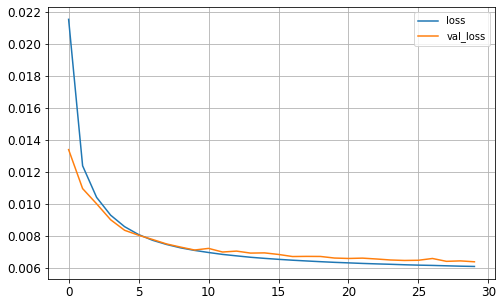

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
idx = [np.where(y_test==c)[0][0] for c in range(10)]
noisy_images = noisy_X_test_flatten[idx]
origin_images = X_test_flatten[idx]
reconst_images = autoencoder.predict(origin_images)

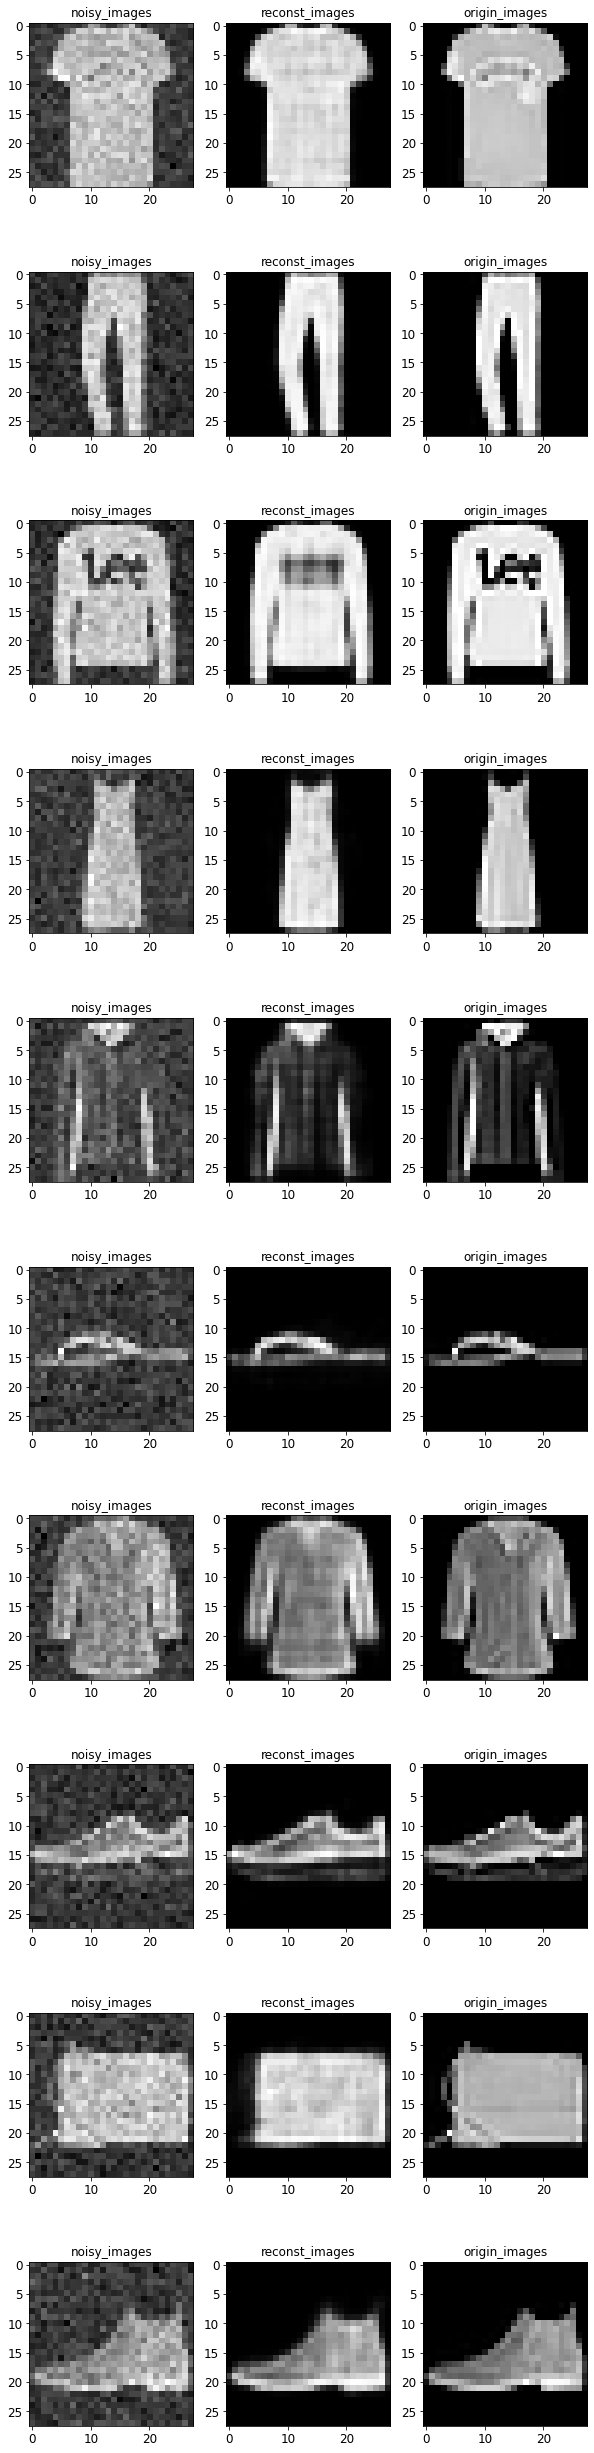

In [ ]:
plt.figure(figsize=(10,45))
for i in range(10):
    plt.subplot(10,3,i*3+1)
    plt.imshow(noisy_images[i].reshape(28,28), cmap="gray")   
    plt.title('noisy_images')
    plt.subplot(10,3,i*3+2)
    plt.imshow(reconst_images[i].reshape(28,28), cmap="gray")
    plt.title('reconst_images')
    plt.subplot(10,3,i*3+3)
    plt.imshow(origin_images[i].reshape(28,28), cmap="gray")
    plt.title('origin_images')
plt.show()